In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.datasets import load_iris, load_digits
from sklearn.manifold import Isomap
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from matplotlib.patches import ConnectionPatch

## General style setup

In [36]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [2]:
plt.style.use('tableau-colorblind10')
#plt.rcParams.update({'font.size': 20})

## Motivational example

This motivational example shows the additional value in visualizing what you are doing, while you are doing it!

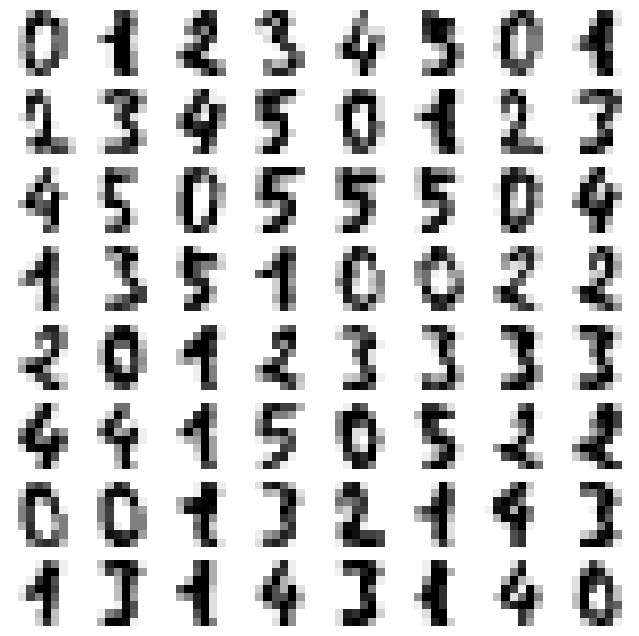

In [3]:
# Handwritten digits 0-5
digits = load_digits(n_class = 6)

# Show images of what we are working with
fig, ax = plt.subplots(8, 8, figsize = (8, 8))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.data[i, :].reshape(8, 8), cmap = 'binary')
    # Remove all spines
    for spine in axi.spines.values():
        spine.set_visible(False)
    
    # Remove all ticks
    axi.set_xticks([])
    axi.set_yticks([])

In [4]:
digits.data[0, :]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [5]:
iso = Isomap(n_components = 2, n_neighbors = 10)
projection = iso.fit_transform(digits.data[:, :])

In [6]:
print(digits.data.shape)
print(projection.shape)

(1083, 64)
(1083, 2)


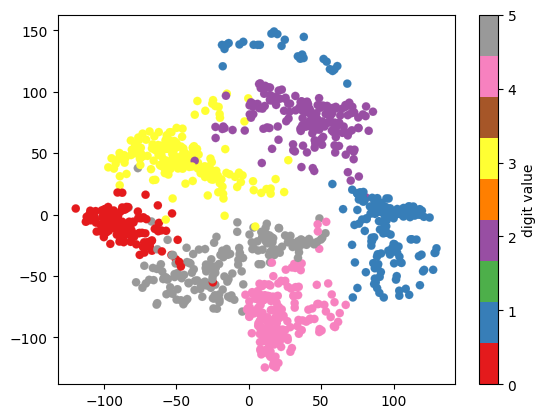

In [10]:
fig, ax = plt.subplots()
scatter_2d = ax.scatter(projection[:, 0],
                  projection[:, 1],
                  lw = 0.1,
                  c = digits.target,
                  cmap=mpl.colormaps.get_cmap('Set1'))

plt.colorbar(scatter_2d,
                ticks = range(6),
                label = 'digit value',
                ax = ax)
plt.show()

In [11]:
from matplotlib.colors import ListedColormap

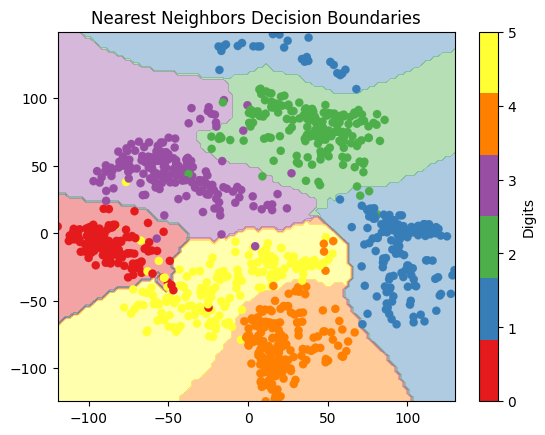

In [14]:
num_neighbours = 10
num_points_grid = 100

# Fit a k-nearest neighbors classifier
knn = KNeighborsClassifier(n_neighbors = num_neighbours)
knn.fit(projection, digits.target)

# Create a meshgrid to plot decision boundaries
x_min, x_max = projection[:, 0].min(), projection[:, 0].max()
y_min, y_max = projection[:, 1].min(), projection[:, 1].max()
x_mesh, y_mesh = np.meshgrid(np.linspace(x_min, x_max, num = num_points_grid), 
                                 np.linspace(y_min, y_max, num = num_points_grid))

# Predict the labels for each point in the meshgrid
x_flat = x_mesh.reshape(-1, 1)
y_flat = y_mesh.reshape(-1, 1)

# TODO: Change this pragmatic solution by a real one, fixing the colorbar!
z = knn.predict(np.concatenate([x_flat, y_flat], axis=1)).astype(float)
z[z == 4] = 4.3
z_mesh = z.reshape(x_mesh.shape)

# Get unique class labels and assign a color to each label
unique_labels = np.unique(digits.target)
colors = mpl.colormaps.get_cmap('Set1')
#colors = plt.cm.get_cmap('Set1', len(unique_labels))

# Create a dictionary to map labels to colors
label_to_color = {label: colors(i) for i, label in enumerate(unique_labels)}

# Create a ListedColormap
custom_cmap = ListedColormap([label_to_color[label] for label in unique_labels])


fig, ax = plt.subplots()
# Plot the decision boundaries
contourf_2d = ax.contourf(x_mesh, 
                            y_mesh, 
                            z_mesh,
                            alpha=0.4,
                            cmap=custom_cmap)#,
                           # num_levels = 4,
                           # edgecolor = 'k')

scatter_2d = ax.scatter(projection[:, 0],
                            projection[:, 1],
                            lw = 0.1,
                            c = digits.target,
                            cmap = custom_cmap)

plt.colorbar(scatter_2d,
                ticks = range(6),
                label = 'Digits',
                ax = ax)

# plt.colorbar(contourf_2d,
#                 ticks = range(6),
#                 label = 'Bounds',
#                 ax = ax)


# Set labels and show the plot
ax.set_title('Nearest Neighbors Decision Boundaries')
plt.show()

## Basic visuals in matplotlib

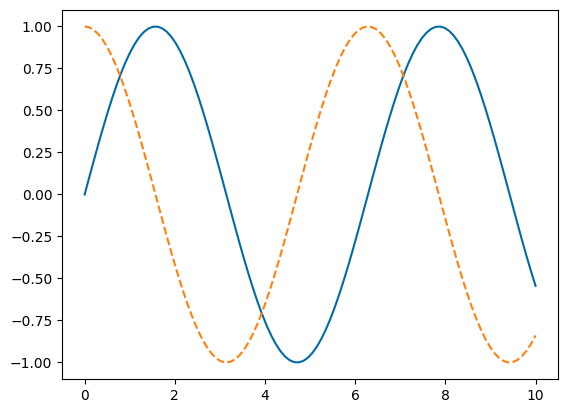

In [15]:
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

#### MATLAB style plotting (Quick & dirty)

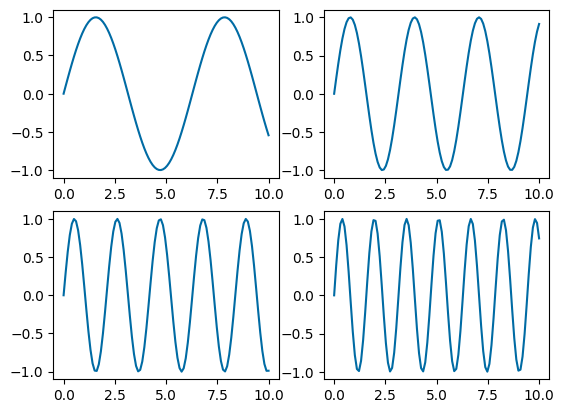

In [16]:
plt.figure()

for i in range(1, 5):
    plt.subplot(2, 2, i) #rows, columns, panel number
    plt.plot(x, np.sin(i * x))

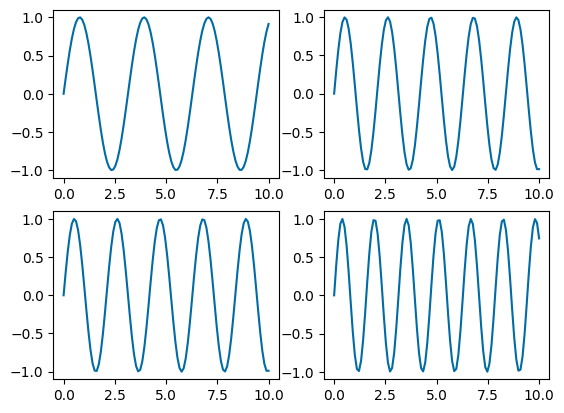

In [17]:
fig, axes = plt.subplots(2, 2)  # Creates a 2x2 grid of subplots

for i in range(1, 3):
    for j in range(1, 3):
        ax = axes[i-1, j-1]
        ax.plot(x, np.sin((i+j) * x))

plt.show()


## Lines & markers

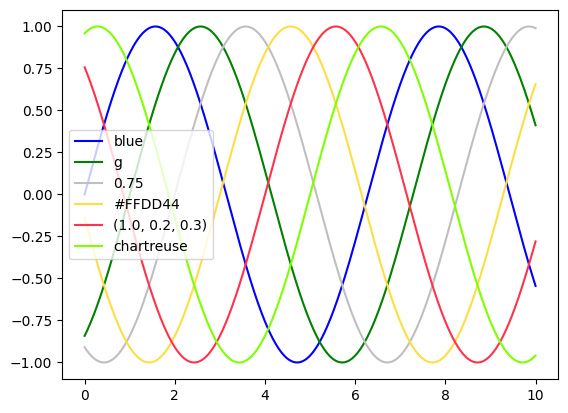

In [22]:
fig, ax = plt.subplots()

x = np.linspace(0, 10, 10 ** 3)
colors = ['blue' # Color by (full) name
             , 'g' # Shorthand name (rgbcmyk)
             , '0.75' # Grayscale between 0 and 1
             , '#FFDD44' # Hex color (RRGGBB from 00 to FF)
             , (1.0, 0.2, 0.3) # RGB tuple (values from 0 to 1)
             , 'chartreuse'] # All html color names supported

for n, color in enumerate(colors):
    ax.plot(x
                , np.sin(x - n)
                , color = color
                , label = str(color))
ax.legend()
plt.show()

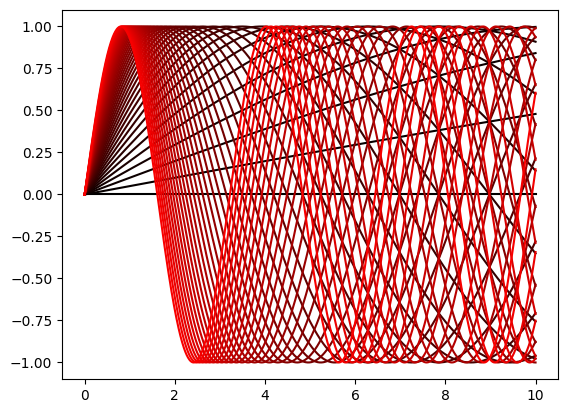

In [23]:
fig, ax = plt.subplots()

step = 1 / 20
max_val = 2
for a in np.arange(0, max_val, step):
    ax.plot(x, np.sin(a * x), color = (a / max_val, 0, 0))

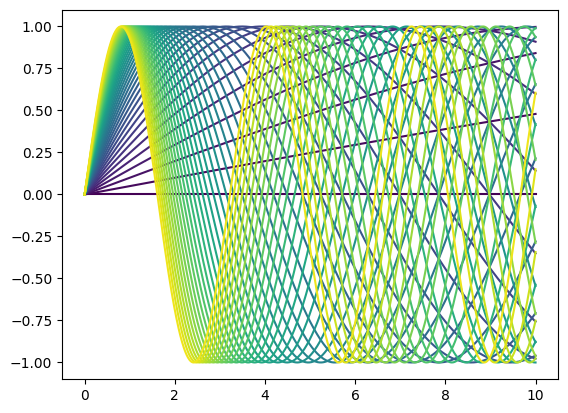

In [24]:
fig, ax = plt.subplots()
# Choose a colormap
cmap = plt.cm.viridis
# Plotting
for i, a in enumerate(np.arange(0, max_val, step)):
    color = cmap(i / (max_val / step))  # Get color from colormap
    ax.plot(x, np.sin(a * x), color=color)

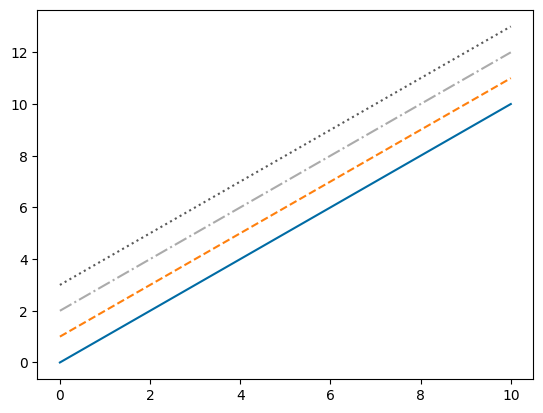

In [25]:
linestyles = ['-'       # 'solid'
                 , '--' #'dashed'
                 , '-.' #'dashdot'
                 , ':'] # 'dotted'

fig, ax = plt.subplots()
for i, linestyle in enumerate(linestyles):
    ax.plot(x, x + i, linestyle = linestyle)

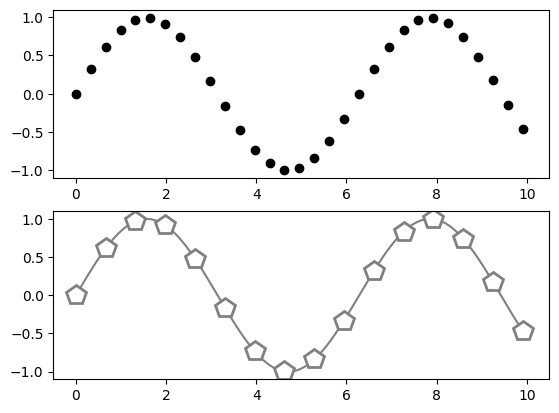

In [26]:
y = np.sin(x)

fig, axes = plt.subplots(2, 1)
axes[0].plot(x
                 , y
                 , 'o'
                 , color = 'k'
                 , markevery = len(x) // 30)
axes[1].plot(x
                 , y
                 , '-p'
                 , markersize = 15
                 , color = 'gray'
                 , markerfacecolor = 'white'
                 , markeredgecolor = 'gray'
                 , markeredgewidth = 2
                 , markevery = len(x) // 15)

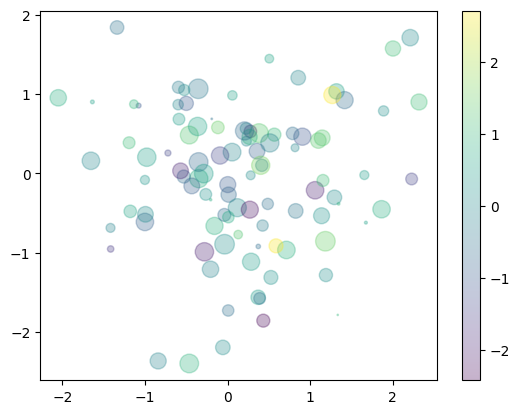

In [28]:
# Generating random data
N = 10 ** 2
x = np.random.randn(N)
y = np.random.randn(N)
colors = np.random.randn(N)
sizes = 2 * 10 ** 2 * np.random.rand(N)

fig, ax = plt.subplots()

sc = ax.scatter(x
                    , y
                    , c=colors
                    , s=sizes
                    , alpha=0.3
                    , cmap='viridis')

# Adding a colorbar
plt.colorbar(sc)
plt.show()

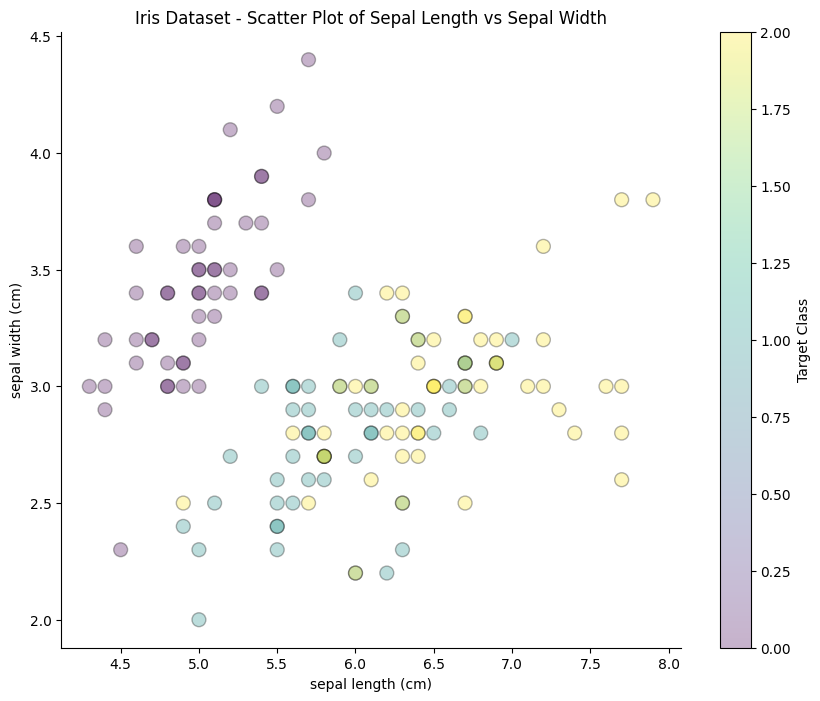

In [29]:
# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target
feature_names = iris.feature_names

# Create a scatter plot
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot for the first two features
scatter = ax.scatter(data[:, 0]
                        , data[:, 1]
                        , c=target
                        , cmap='viridis'
                        , edgecolor='k'
                        , s=100
                        , alpha=0.3)

# Set labels and title
ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])
ax.set_title('Iris Dataset - Scatter Plot of Sepal Length vs Sepal Width')

# Add a colorbar
cb = plt.colorbar(scatter, ax=ax)
cb.set_label('Target Class')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

## Errors plotten

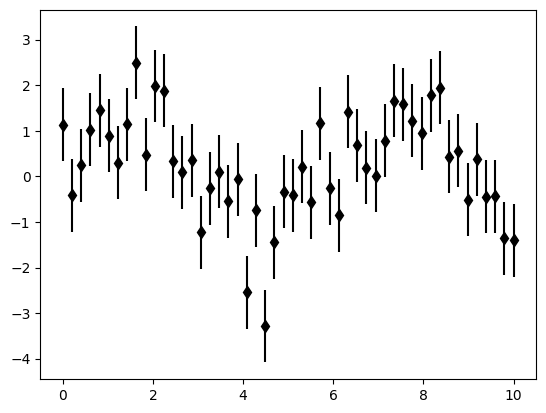

In [31]:
N = 50
x = np.linspace(0, 10, N)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(N)

plt.errorbar(x
                , y
                , yerr = dy
                , marker = 'd'
                , color = 'k'
                , ls = '')
plt.show()

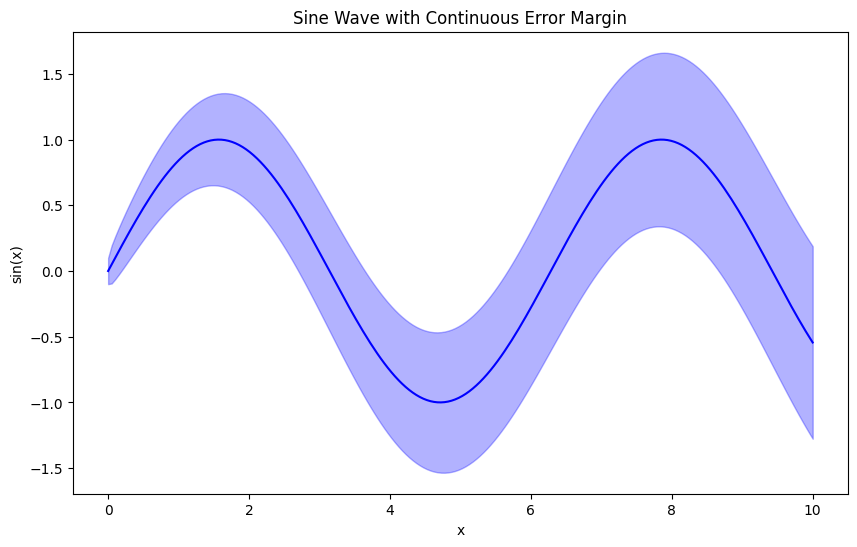

In [32]:
# Generate some data
x = np.linspace(0, 10, 200)
y = np.sin(x)
error = 0.1 + 0.2 * np.sqrt(x)  # Example of increasing error over x

# Create the plot
fig, ax = plt.subplots(figsize = (10, 6))

# Plot the main line
ax.plot(x, y, label='Sine wave', color='blue')

# Add a shaded area to represent the error
ax.fill_between(x, y - error, y + error, color='blue', alpha=0.3)

# Labels and title
ax.set_xlabel('x')
ax.set_ylabel('sin(x)')

ax.set_title('Sine Wave with Continuous Error Margin')
plt.show()

## Histograms

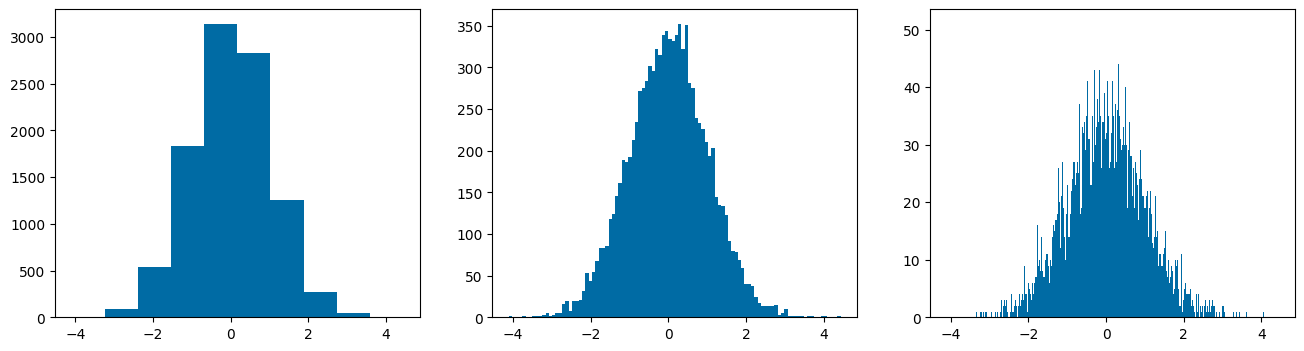

In [33]:
N = 10 ** 4
nbins_list = [10, 100, 1000]
data = np.random.randn(N)

fig, ax = plt.subplots(1, 3, figsize = (16, 4))
for n, nbins in enumerate(nbins_list):
    ax[n].hist(data, bins = nbins)

In [34]:
counts, bin_edges = np.histogram(data, bins = 9)
for n, (count, bin_edge) in enumerate(zip(counts, bin_edges)):
    left_edge = '-inf' if n == 0 else np.round(bin_edges[n-1], 2)
    right_edge = '+inf' if n == len(counts) - 1 else np.round(bin_edge, 2)
    print(f"[{left_edge}, {right_edge}] : {count}")

[-inf, -4.1] : 9
[-4.1, -3.15] : 128
[-3.15, -2.2] : 932
[-2.2, -1.26] : 2684
[-1.26, -0.31] : 3643
[-0.31, 0.64] : 2026
[0.64, 1.59] : 505
[1.59, 2.54] : 68
[2.54, +inf] : 5


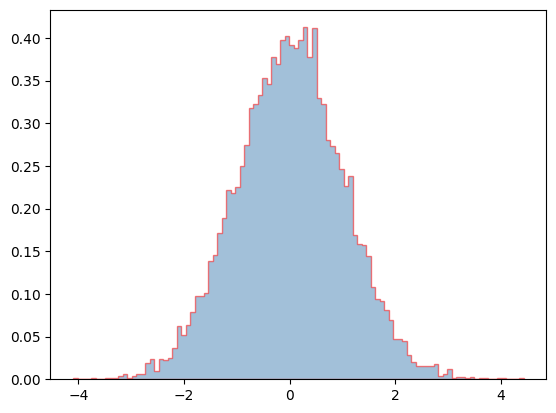

In [35]:
fig, ax = plt.subplots()
ax.hist(data
           , bins = 100
           , density = True
           , alpha = 0.5
           , histtype = 'stepfilled'
           , color = 'steelblue'
           , edgecolor = 'red');

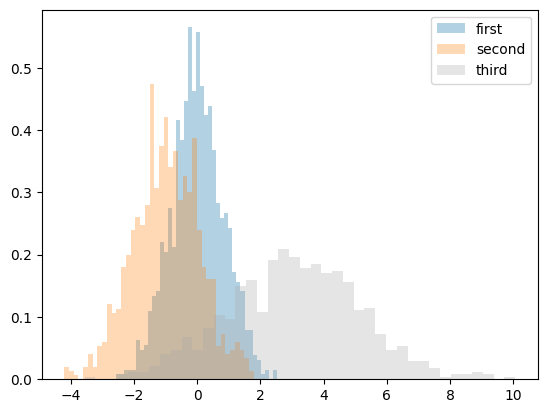

In [36]:
datasets = {
    'first' : np.random.normal(0, 0.8, 10 ** 3),
    'second' : np.random.normal(-1, 1, 10 ** 3),
    'third' : np.random.normal(3, 2, 10 ** 3)
}

hist_settings = {
                    'histtype' : 'stepfilled',
                    'alpha' : 0.3,
                    'density' : True,
                    'bins' : 40
                    }

fig, ax = plt.subplots()
for name, data in datasets.items():
    ax.hist(data, label = name, **hist_settings)
    
ax.legend();

## 2D histogram

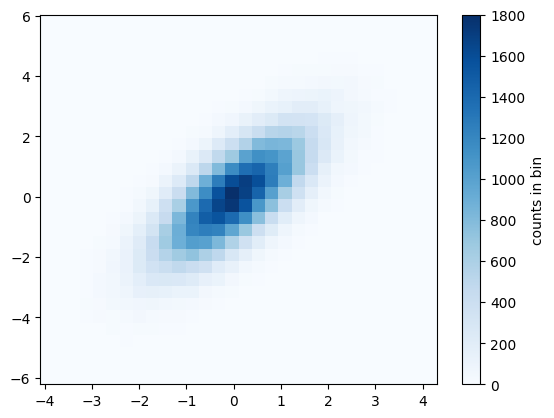

In [37]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10**5).T

fig, ax = plt.subplots()
counts, xedges, yedges, hist2d_norm = ax.hist2d(x, y, bins = 30, cmap = 'Blues')
cb = plt.colorbar(hist2d_norm, ax = ax)
cb.set_label('counts in bin')

## Contour plots

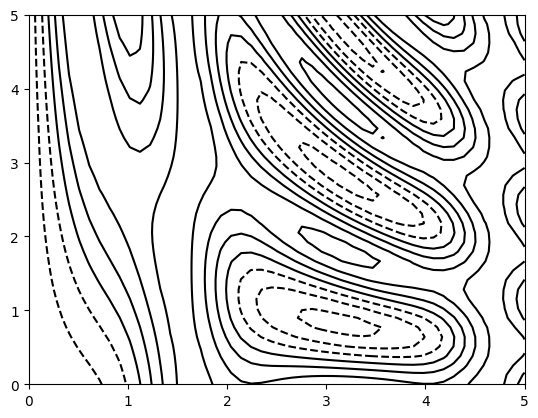

In [39]:
def f(x, y):
    return np.cos(10 + x * y) * np.cos(x) + np.sin(x) ** 10

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

x_mesh, y_mesh = np.meshgrid(x, y)
z_mesh = f(x_mesh, y_mesh)

fig, ax = plt.subplots()
ax.contour(x_mesh, y_mesh, z_mesh, colors = 'black')
plt.show()

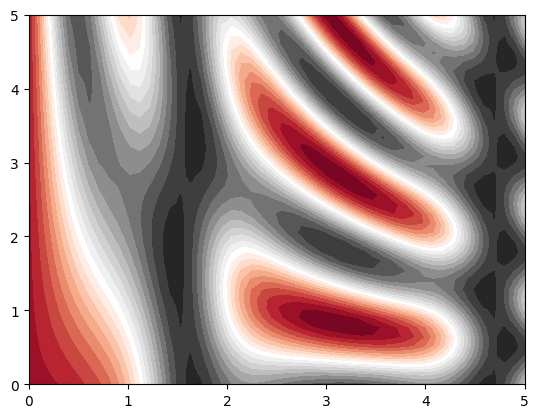

In [40]:
fig, ax = plt.subplots()
ax.contourf(x_mesh, y_mesh, z_mesh, levels = 20, cmap = 'RdGy')
plt.show()

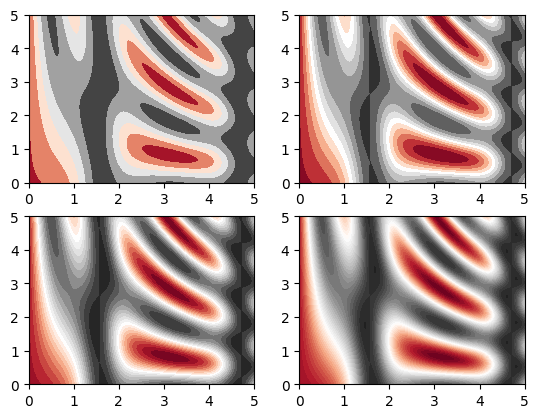

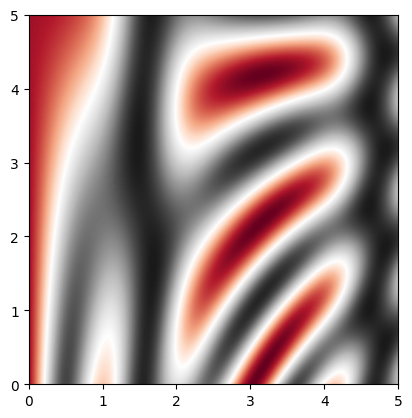

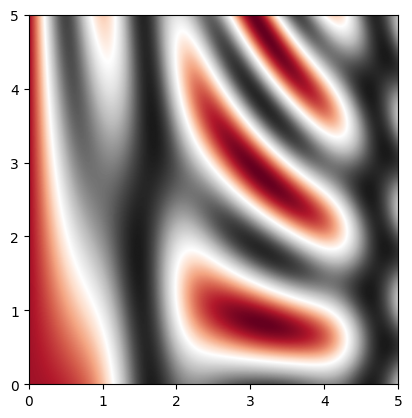

In [42]:
def f(x, y):
    return np.cos(10 + x * y) * np.cos(x) + np.sin(x) ** 10

x = np.linspace(0, 5, 500)
y = np.linspace(0, 5, 400)

x_mesh, y_mesh = np.meshgrid(x, y)
z_mesh = f(x_mesh, y_mesh)

levels = [5, 10, 20, 50]

fig, ax = plt.subplots(2, 2)
for n, level in enumerate(levels):
    row = n // 2
    col = n % 2
    ax[row, col].contourf(x_mesh
                              , y_mesh
                              , z_mesh
                              , levels = level
                              , cmap = 'RdGy')
    
fig, ax = plt.subplots()
ax.imshow(z_mesh
             , extent = [0, 5, 0, 5]
             , cmap = 'RdGy')

fig, ax = plt.subplots()
ax.imshow(z_mesh
             , extent = [0, 5, 0, 5]
             , origin = 'lower'
             , cmap = 'RdGy')
plt.show()

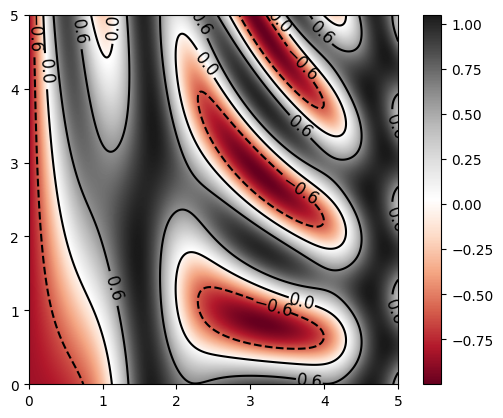

In [43]:
fig, ax = plt.subplots()

contours = ax.contour(x_mesh, y_mesh, z_mesh, 3, colors = 'black')
ax.clabel(contours, inline = True, fontsize = 12)

color_plot = ax.imshow(z_mesh, extent = [0, 5, 0, 5], origin = 'lower', cmap = 'RdGy')

plt.colorbar(color_plot, ax=ax);

## Legends

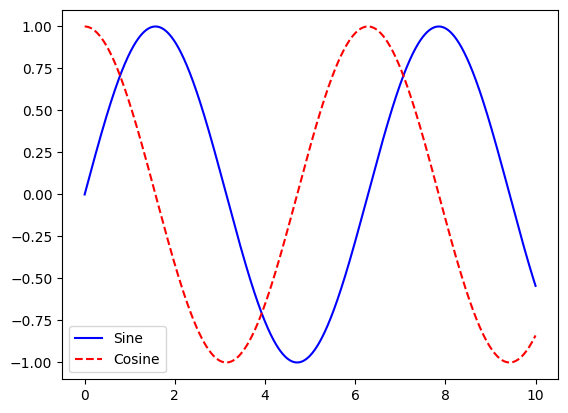

In [44]:
x = np.linspace(0, 10, 10 ** 3)

fig, ax = plt.subplots()
ax.plot(x,
            np.sin(x),
            '-b',
            label = 'Sine'
       )

ax.plot(x,
            np.cos(x),
            '--r',
            label = 'Cosine'
       )

leg = ax.legend()

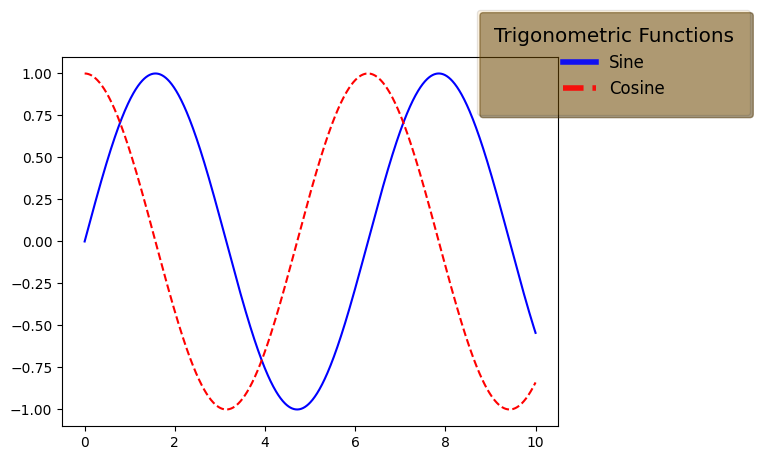

In [45]:
# Create the plot
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')

# Create a fancy legend
leg = ax.legend(
    fontsize='large',                # Font size
    title='Trigonometric Functions', # Title for the legend
    title_fontsize='x-large',        # Title font size
    shadow=True,                     # Shadow effect
    fancybox=True,                   # Rounded corners
    framealpha=0.1,                  # Transparency of the frame
    borderpad=1,                     # Padding around the legend
    facecolor='orange',              # Background color
    edgecolor='black',               # Edge color of the frame
    frameon=True,                    # Enable the frame
    bbox_to_anchor=(.82, .82)        # Legend position
)

# You can further customize the legend handles
for handle in leg.legend_handles:
    handle.set_linewidth(4)  # Set the line widths
    handle.set_alpha(0.9)    # Set the line alpha (transparency)

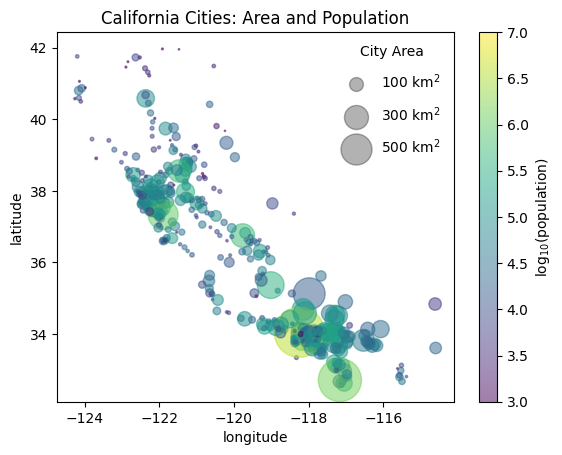

In [47]:
df_cities = pd.read_csv('california_cities.csv')

fig, ax = plt.subplots()
plot_city = ax.scatter(df_cities['longd'],
                          df_cities['latd'],
                          label = None,
                          c = np.log10(df_cities['population_total']),
                          cmap = 'viridis',
                          s = df_cities['area_total_km2'],
                          alpha = 0.5)


ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
plt.colorbar(plot_city, ax = ax, label = 'log$_{10}$(population)')
plot_city.set_clim(3, 7)

for area in [100, 300, 500]:
    ax.scatter([],
                   [],
                   c = 'k',
                   alpha = 0.3,
                   s = area,
                   label = f"{area} km$^2$")
    
ax.legend(scatterpoints = 1,
             frameon = False,
             labelspacing = 1,
             title = 'City Area')

ax.set_title("California Cities: Area and Population")
plt.show()

## Annoteren & inset plots

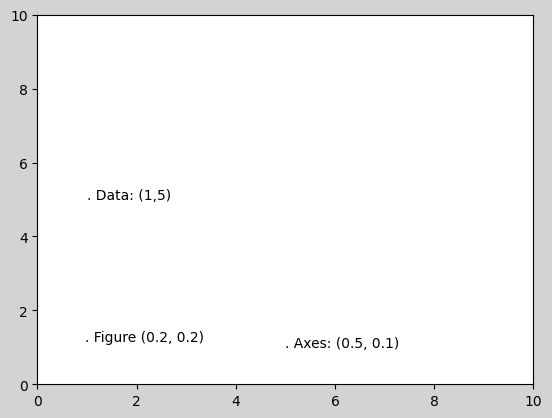

In [48]:
fig, ax = plt.subplots(facecolor = 'lightgray')
ax.axis([0, 10, 0, 10])

# transform=ax.transData is the default, but we'll specify it anyway
ax.text(1, 5, ". Data: (1,5)", transform = ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform = ax.transAxes)
ax.text(0.2, 0.2, ". Figure (0.2, 0.2)", transform = fig.transFigure);

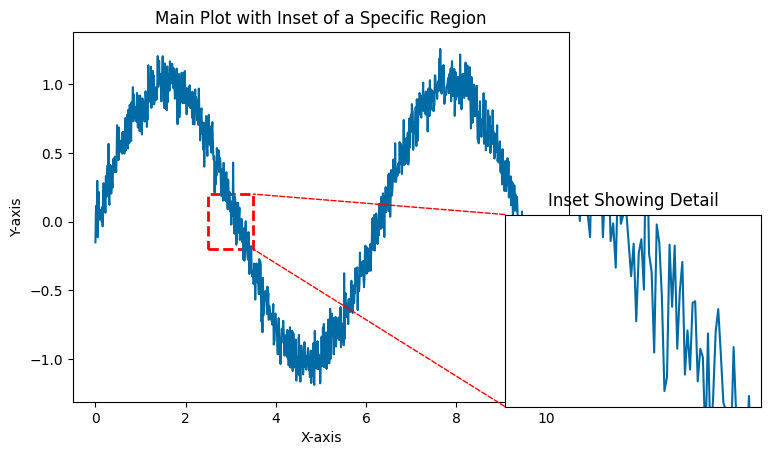

In [50]:
std = 0.1
num_points = 10 ** 3

# Generate some data that's hard to see in detail
x = np.linspace(0, 10, num_points)
y = np.sin(x) + np.random.normal(size=num_points) * std

# Create the main figure
fig, ax = plt.subplots()

# Plot the main figure
ax.plot(x, y, label='Original Data')

# Set the title and labels
ax.set_title('Main Plot with Inset of a Specific Region')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

# Create an inset Axes instance with a different scale
ax_inset = fig.add_axes([0.8, 0.1, 0.4, 0.4])  # x, y, width, height in fractions of figure width and height
# Show the plot with the inset

# Define the region of interest for the inset axes
x1, x2, y1, y2 = 2.5, 3.5, -0.2, 0.2  # These values might change depending on your data
ax_inset.set_xlim(x1, x2)
ax_inset.set_ylim(y1, y2)

ax_inset.set_xticks([])
ax_inset.set_yticks([])

# Plot the same data on the inset, focusing on the region of interest
ax_inset.plot(x, y, label='Zoomed In')

# Optionally, set the title for the inset plot
ax_inset.set_title('Inset Showing Detail')

# Draw a rectangle on the main plot to indicate the zoomed area
rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, edgecolor='r', facecolor='none', lw=2, linestyle="--")
ax.add_patch(rect)

# Create the lines connecting the inset to the rectangle with ConnectionPatch
coordsA = "data"
coordsB = "data"
con1 = ConnectionPatch(xyA=(x1, y2), 
                           xyB=(x2, y2), 
                           coordsA=coordsA, 
                           coordsB=coordsB,
                           axesA=ax_inset, 
                           axesB=ax, 
                           color='red', 
                           linestyle="--")

con2 = ConnectionPatch(xyA=(x1, y1), 
                           xyB=(x2, y1), 
                           coordsA=coordsA, 
                           coordsB=coordsB,
                           axesA=ax_inset, 
                           axesB=ax, 
                           color='red', 
                           linestyle="--")

# Add the lines to the plots
ax_inset.add_artist(con1)
ax_inset.add_artist(con2)
plt.show()

## met dataframes

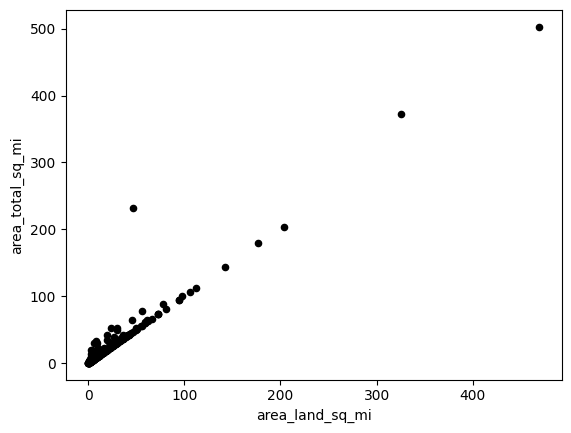

In [51]:
ax = (df_cities.plot
               .scatter(x = 'area_land_sq_mi',
                            y = 'area_total_sq_mi',
                            color = 'k'))